# Initial housing_data EDA

Note to self: Necessary more registers for good analysis (Order of thousands). 

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 
sns.set(style="dark",palette="deep")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

In [2]:
df = pd.read_csv("../../data/housing_data.csv")
df = df.set_index("id")

## Exploring data

In [3]:
df.head()

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2669329904,324.0,5.0,3.0,4.0,340000.0,house,Sao Tome
2667338201,51.0,2.0,1.5,1.0,295000.0,NaN,Santa Teresa
2643720430,94.0,3.0,4.0,2.0,629000.0,apartment,Cidade Jardim
2681509397,66.0,2.0,2.0,2.0,460000.0,apartment,Imbuí
2671493238,82.0,3.0,3.0,2.0,649990.0,apartment,Piatã


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 2669329904 to 2681819271
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   areas         471 non-null    float64
 1   bedrooms      469 non-null    float64
 2   bathrooms     469 non-null    float64
 3   parkingSpots  401 non-null    float64
 4   prices        466 non-null    float64
 5   type          462 non-null    object 
 6   neighborhood  471 non-null    object 
dtypes: float64(5), object(2)
memory usage: 29.4+ KB


Areas are set in m² and Prices are in BRL.

In [5]:
df.describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,471.000000,469.000000,469.000000,401.000000,4.660000e+02
mean,85.267516,2.305970,1.581023,1.283042,1.751957e+05
std,39.179627,0.564898,0.825503,0.530624,2.153010e+05
min,32.000000,1.000000,1.000000,1.000000,4.000000e+04
25%,68.000000,2.000000,1.000000,1.000000,5.850000e+04
50%,79.000000,2.000000,1.000000,1.000000,9.000000e+04
75%,90.000000,3.000000,2.000000,1.500000,1.587500e+05
max,480.000000,5.000000,5.000000,4.000000,1.280000e+06


### Numerical columns

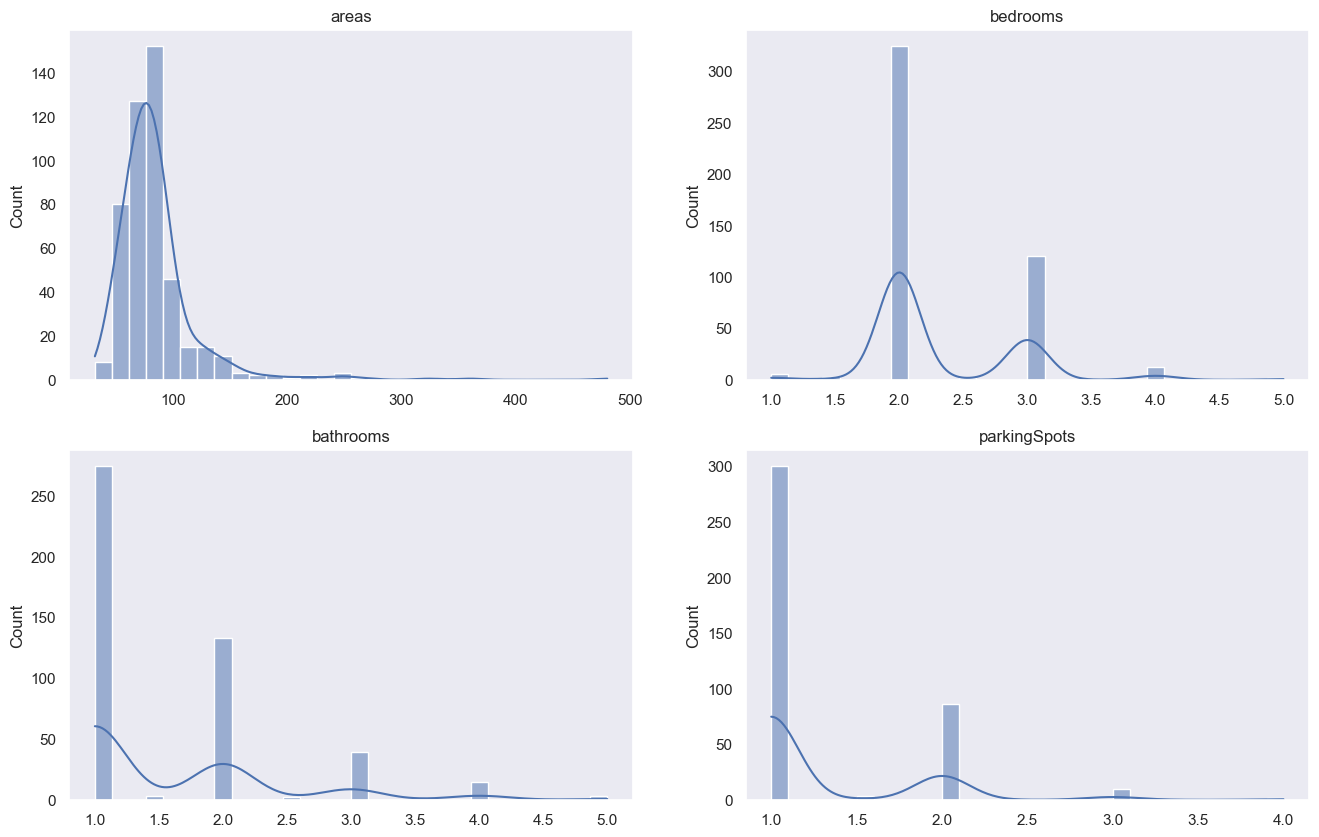

In [6]:
categories = np.reshape(["areas", "bedrooms", "bathrooms", "parkingSpots"], (2,2))

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i in range(2):
    for j in range(2):
        axs[i][j].set_title(categories[i][j])
        sns.histplot(x=df[categories[i][j]], bins=30, ax=axs[i][j], kde=True).set(xlabel=None)

<Axes: xlabel='prices', ylabel='Count'>

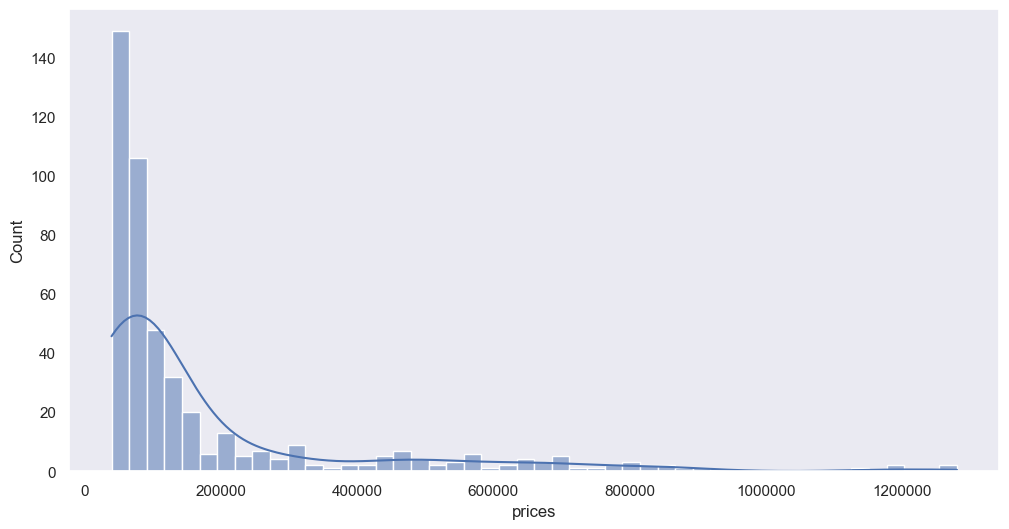

In [7]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
sns.histplot(x=df.prices, kde=True)

<Axes: xlabel='areas', ylabel='prices'>

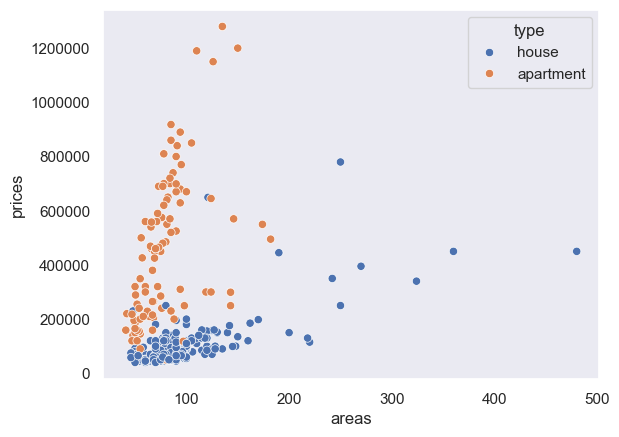

In [16]:
plt.ticklabel_format(style='plain')
sns.scatterplot(x=df.areas, y=df.prices, hue=df.type)

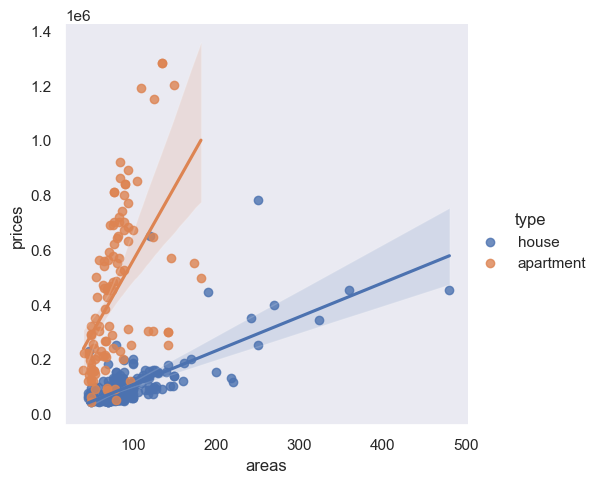

In [19]:
sns.lmplot(data=df, x="areas", y="prices", hue="type")

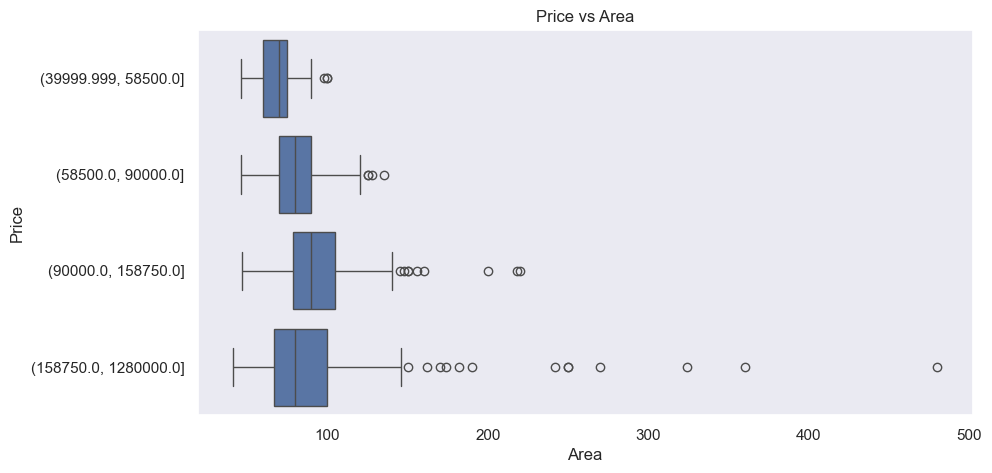

In [9]:
df1 = df
df1['prices_bins'] = pd.qcut(df.prices, q=[0, .25, .5, .75, 1], duplicates='drop')
plt.figure(figsize=(10,5))
sns.boxplot(x=df1.areas, y=df1.prices_bins)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

### Categorical Columns

In [10]:
df.neighborhood.value_counts()

neighborhood
Ribeira                       20
Itapuã                        18
Sao Caetano                   16
Pernambués                    14
Cajazeiras X                  12
BA                            12
Cabula VI                     10
Pituaçu                        9
Saboeiro                       9
Liberdade                      8
Boca do Rio                    8
Dom Avelar                     8
Bonfim                         8
Castelo Branco                 8
Caixa D´Água                   7
Paripe                         7
Imbuí                          7
Águas Claras                   6
Mussurunga I                   6
Doron                          6
Cajazeiras XI                  6
Resgate                        6
Armação                        6
Uruguai                        6
Patamares                      6
Engenho Velho de Brotas        6
Brotas                         5
Pituba                         5
Caminho Das Árvores            5
Piatã                         

'BA' seems to be a parsing error due to lack of neighborhood on the raw data (BA stands for Bahia. It's the state, not the neighborhood). We'll set that as NaN.

In [11]:
df.neighborhood = df.neighborhood.apply(lambda x: np.nan if x == "BA" else x)

<Axes: xlabel='type', ylabel='count'>

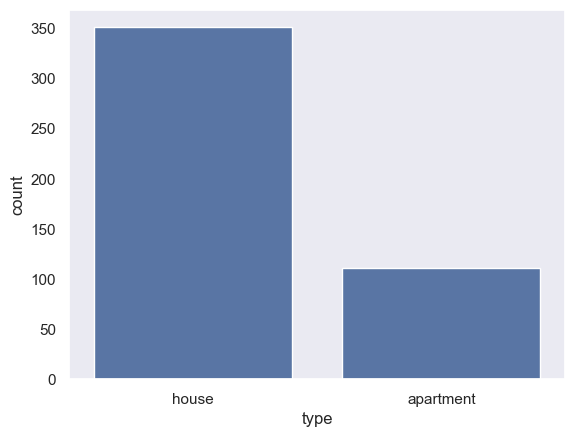

In [12]:
sns.countplot(x=df.type)